# FoodHub Data Analysis

## Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

## Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

## Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

data = pd.read_csv('foodhub_order.csv')

df = data.copy()

### Data structure

In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Number of rows and columns

In [ ]:
# Get the number of rows and columns with the shape attribute
nb_rows, nb_cols = df.shape

print(f"Number of rows: {nb_rows}")
print(f"Number of columns: {nb_cols}")

Number of rows: 1898
Number of columns: 9


### Datatypes

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Possible missing values

In [ ]:
# Filter the null values in each column
# Sum the null values (False = 0 and True = 1)
df[df.isna()].sum()

order_id                 0.0
customer_id              0.0
restaurant_name            0
cuisine_type               0
cost_of_the_order        0.0
day_of_the_week            0
rating                     0
food_preparation_time    0.0
delivery_time            0.0
dtype: object

### Statistical summary & minimum, average, and maximum time it takes for food to be prepared once an order is placed

In [ ]:
# Get the statistical summary for the costs, preparation and delivery times
stats = df.describe().iloc[:, 2:]

# Print the mean, min and max values for the fodd_preparation_time column
for m in ("mean", "min", "max"):
    data = stats.loc[m, 'food_preparation_time']
    print(f"{m} preparation time: {float(data):.1f} min")

stats

mean preparation time: 27.4 min
min preparation time: 20.0 min
max preparation time: 35.0 min


,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


#### Observations:

The time to prepare an order varies from **20 min** to **35 min**. The average time of **27.4 min** is almost exactly the mean value of 20 min and 35 min. Some possible inferences from that result are:
- A symmetric distribution, where there is an equivalent number of "slow" and "fast" orders.
- A uniform distribution between the min and max values.
- Few outliers, since there presence would skew the mean value towards the min or max value.

The standard deviations of the three variables are not negligible compared to their respective mean value, so their distribution must be investigated.

When looking at the cost column, the gap between the min value and the 25th percentile and between the max value and the 75th percentile indicate possible outliers in the dataset.

### Orders not rated

In [ ]:
# Filter the rows where the rating is not given
# Count the number of rows
df.query("rating == 'Not given'").shape[0]

736

#### Observations:

**736** out of the **1898** orders are not rated, which amounts to **39%** of the orders. This proportion of missing feedback is significant and FoodHub should investigate new ways to induce the customers to rate their order, so that the offer quality keeps on improving.




## Exploratory Data Analysis (EDA)

### Univariate Data Analysis

#### Unique customer IDs, restaurant names and cuisine types

In [ ]:
# Number of unique customer IDs, restaurant names and cuisine types
for col in ["customer_id", "restaurant_name", "cuisine_type"]:
    print(f"Number of unique {col}: {df[col].nunique()}")

Number of unique customer_id: 1200
Number of unique restaurant_name: 178
Number of unique cuisine_type: 14


#### Observations:

There are **1200** customer IDs for 1898 orders, meaning that on average a customer uses FoodHub more than once.

Foodhub offers a wide range of **178** different restaurants splitted in **14** different cuisine categories, so any customer from any population in NYC is likely to find a restaurant that offers what they are looking for.

#### Cost of the order

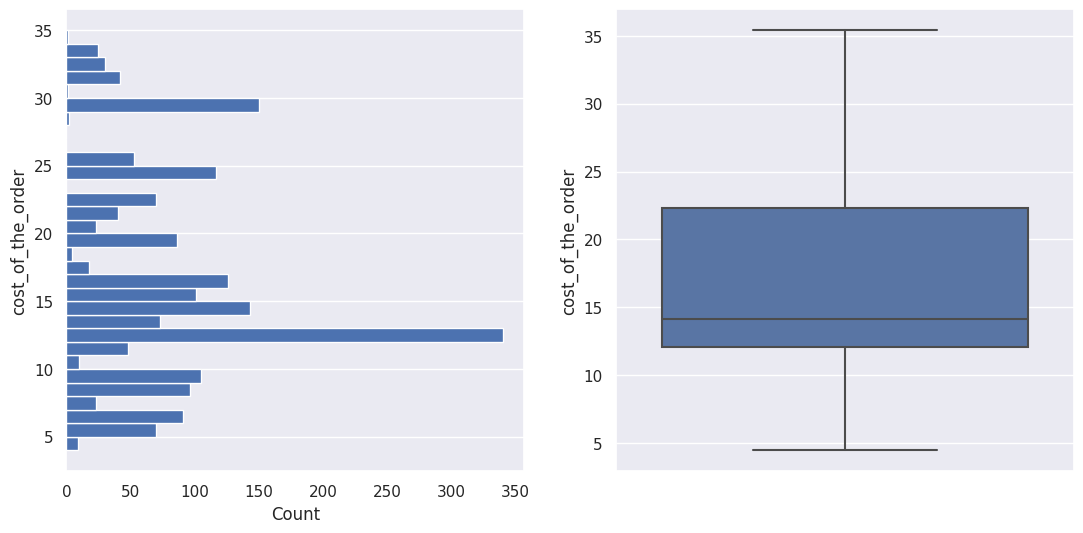


Top 3 most frequent cost ranges:
$12-$13    357
$29-$30    150
$14-$15    143
Name: cost_of_the_order, dtype: int64


In [ ]:
# Figure parameters
fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(13, 6))
ax_hist.grid(False, axis='x')

# Histplot of the number of orders relative to their cost
sns.histplot(
    data = df,
    y = 'cost_of_the_order',
    ax = ax_hist,
    bins=31,
    binrange=(4,35),
    alpha=1
)

# Boxplot of the distribution of costs
sns.boxplot(
    data = df,
    y = 'cost_of_the_order',
    ax = ax_box,
)

plt.show()

# Print the top 3 most frequent cost ranges:
cost_ranges = np.arange(4, 36)
range_labels = [f"${i}-${i + 1}" for i in cost_ranges[:-1]]

most_frequent_cost_ranges = (
    pd.cut(     # Group the values by range
        df.cost_of_the_order,   # Select the cost column
        bins = cost_ranges,     # Group the costs into their cost range
        labels = range_labels   # Rename the bins
    )
    .value_counts() # Count the number of orders in each range
    .head(3)        # Select the top 3
)

print("\nTop 3 most frequent cost ranges:")
print(most_frequent_cost_ranges)


#### Observations:

The distribution of order costs goes from **\$4.47** to **\$35.41** according to Question 4, with no order considered as outliers according to the boxplot - rejecting the hypothesis expressed in Question 4.

The most frequent cost ranges are:
- \$12-\$13 with **340** orders
- \$29-\$30 with **150** orders
- \$14-\$15 with **143** orders

Therefore, the costs distribution is skewed toward the lower values and the median is under $15.

Orders under \$15 generally represent orders for a single person. The distribution indicates that most orders are intended for a single person.

The 3rd quartile is at $22.3 (cf Question 4), hence only 25% of the orders are more expensive. These orders can be:
- Expensive single-person orders: the NYC customers prefer more affordable food for delivery. They may prefer sitting at a restaurant table to have more elaborate dishes which do not have to suffer the delivery process.
- Orders for multiple people: less likely to happen, most customers order for themselves.

#### Food preparation time

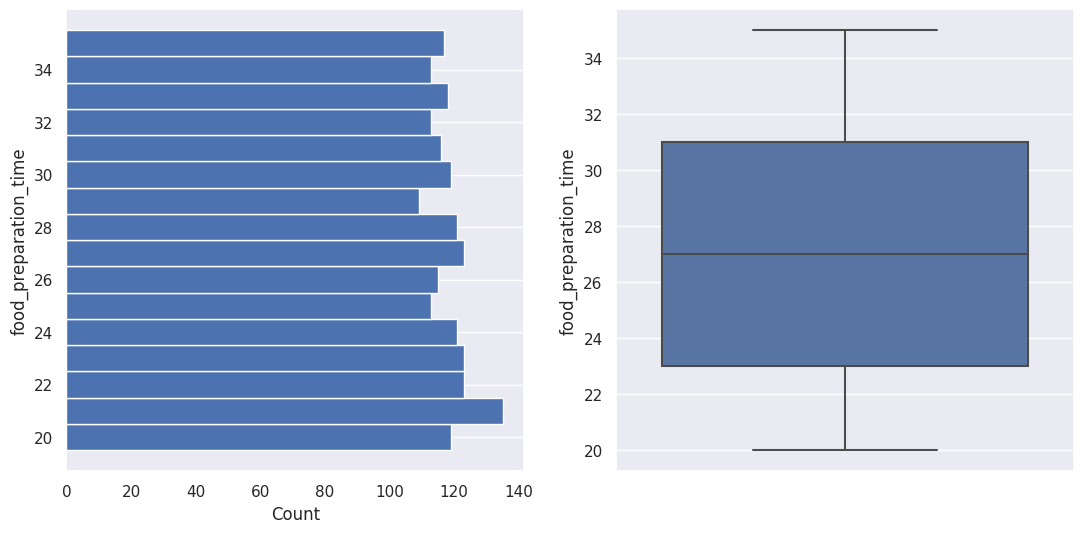

In [ ]:
# Figure parameters
fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(13, 6))
ax_hist.set_yticks(np.arange(20, 36, 2))
ax_hist.grid(False, axis='x')

# Histplot of the number of orders relative to their preparation time
sns.histplot(
    data = df,
    y = 'food_preparation_time',
    ax = ax_hist,
    bins = 15,        # Match the bin number with the range of delivery times
    discrete = True,  # For integer values, align the bars with the xticks
    alpha=1
)

# Boxplot of the distribution of preparation times
sns.boxplot(
    data = df,
    y = 'food_preparation_time',
    ax = ax_box
)

plt.show()

#### Observations

The preparation time is uniformly distributed, which confirm the observations of Question 4 about the min, max and mean values.

#### Day of the week

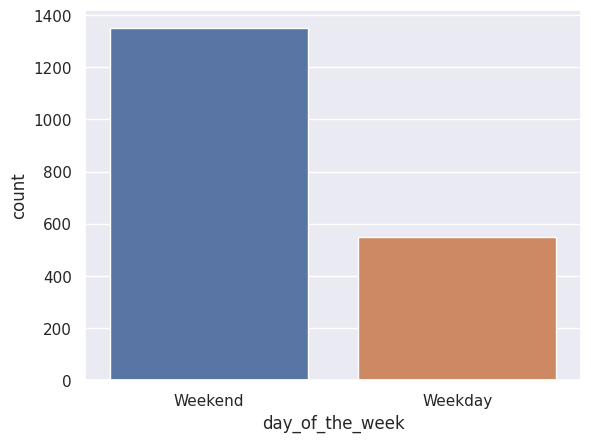

Weekend: 1351 orders
Weekday: 547 orders


In [ ]:
# Countplot of the orders frequency depending on the day of the week
sns.countplot(
    data = df,
    x = "day_of_the_week"
)
plt.show()

# Print the number of orders
for day in ("Weekend", "Weekday"):
    print(f"{day}: {df.query('day_of_the_week == @day').shape[0]} orders")

#### Observations



There are **547** orders on weekdays and **1351** orders on the weekend, i.e. a **247%** increase in demand over the weekend.

On weekdays, people ordre mainly from there workplace or their campus to gain time. During the weekend, people are more likely to order from FoodHub for multiple reasons:

- People associate weekends with relaxation and leisure time. This might lead to increased demand for food delivery as individuals are more likely to order restaurant meals to avoid cooking.

- Weekends are often a time for social events and gatherings, people may order food delivery to cater to these events.

- People typically have more free time on weekends, they might be more inclined to explore new cuisines and restaurants.

#### Delivery time

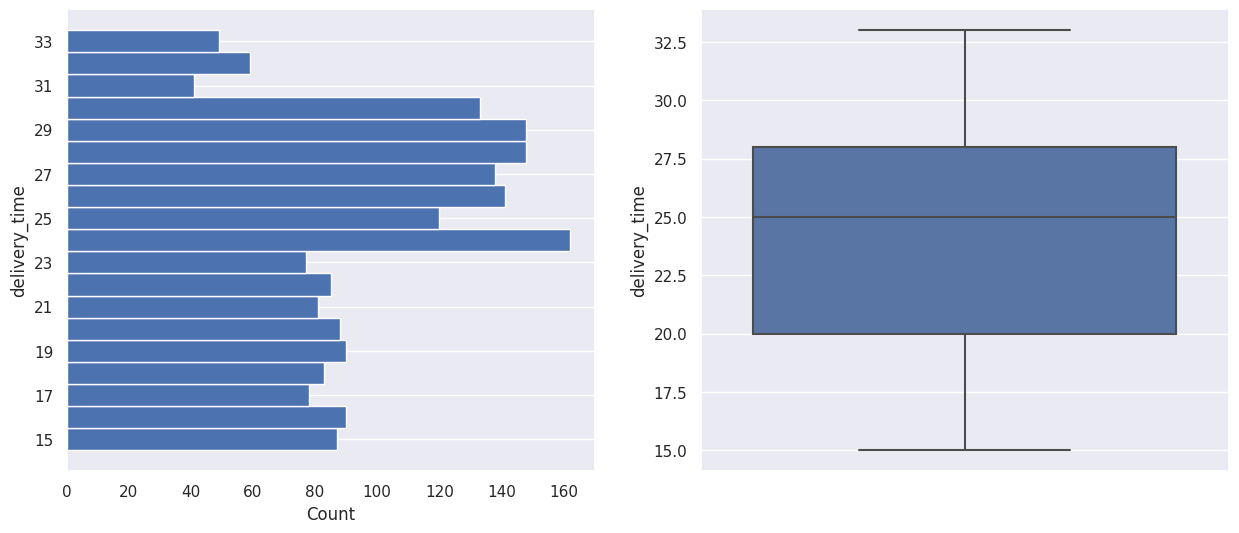

In [ ]:
# Figure parameters
fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(15, 6))
ax_hist.set_yticks(np.arange(15, 34, 2))
ax_hist.grid(False, axis='x')

# Histplot of the number of orders relative to their delivery time
sns.histplot(
    data = df,
    y = 'delivery_time',
    ax = ax_hist,
    bins = 18,        # Match the number of bins with the range of delivery times
    discrete = True,  # For integer values, align the bars with the xticks
    alpha=1
)

# Boxplot of the distribution of delivery times
sns.boxplot(
    data = df,
    y = 'delivery_time',
    ax = ax_box
)

plt.show()

#### Observations


The delivery time distribution is skewed towards the higher values, with orders being more frequently delivered between **24 min** and **30 min** after being prepared. Hence, the median value is at 25 min. The boxplot shows no outlier for delivery time.

Increased delivery times might be caused by the traffic congestion in NYC, when restaurants are far from the delivery location, or bad weather conditions. It could be also due to a momentarily increase in demand which would saturate the restaurants or the delivery service.

#### Ratings

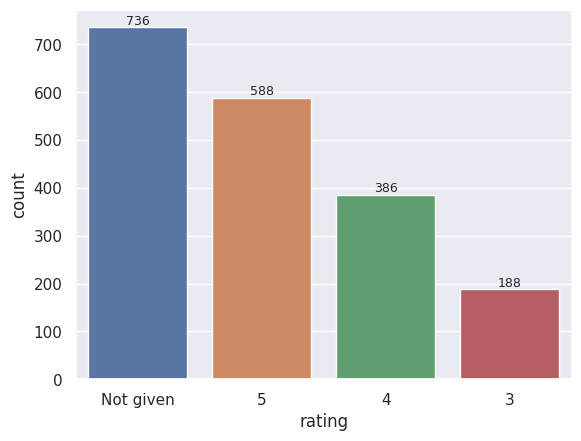

In [ ]:
# Countplot of the ratings frequency depending on their values
bars = sns.countplot(
    data = df,
    x = "rating",
    order = df.rating.value_counts().index # Order the bars by frequency
)

bars.bar_label(bars.containers[0], fontsize=9)

plt.show()

#### Observations

The rated restaurants are well rated, as the rating 5 is given **51%** of the time when a rating is given, and no rating is below 3. So there is an overall satisfaction of the customers with the service. But as observed in Question 3, **736** orders are not rated which is a critical lack of feedback for the restaurants and the platform.

The fact that the number of "Not given" ratings is the highest could indicate that customers who faced issues might not have taken the time to provide a rating. Alternatively, it could also mean that these are new customers who haven't yet formed an opinion about the service.

#### Cuisine types

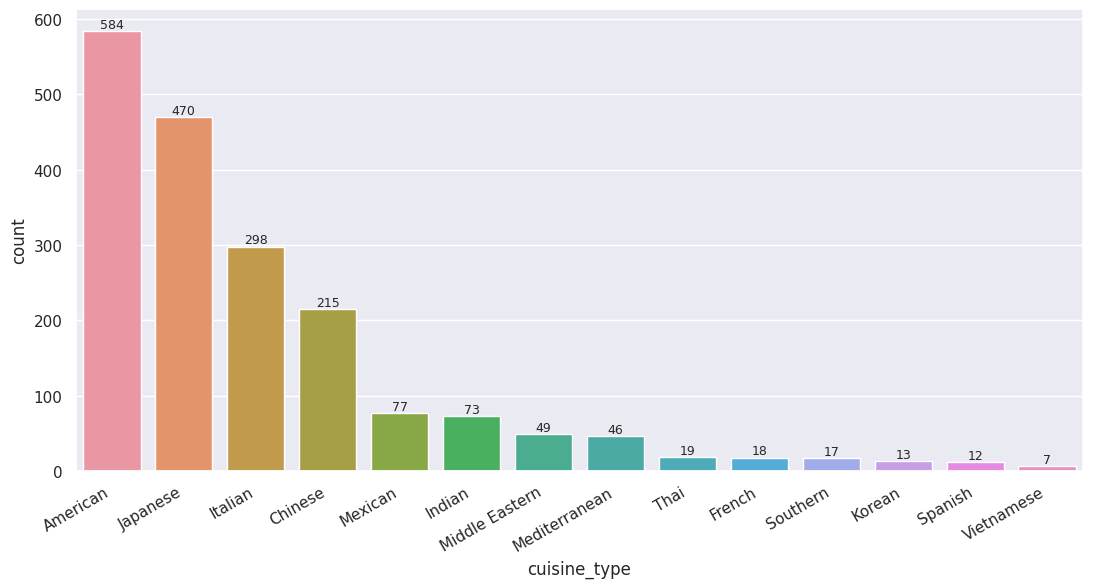

In [ ]:
# Figure parameters
fig, ax = plt.subplots(figsize=(13,6))

# Countplot of the most frequent cuisine types
bars = sns.countplot(
    data = df,
    x = "cuisine_type",
    order = df.cuisine_type.value_counts().index # Order the bars by frequency
)

# Print the values on the bars
bars.bar_label(bars.containers[0], fontsize=9)

plt.xticks(rotation=30, ha='right')
plt.show()

#### Observations

There is a distinct top 4 among the most frequently ordered cuisines: American, Japanese, Italian, and Chinese. These cuisines hold global popularity, and significant Italian and Chinese communities reside in NYC. Additionally, tourism thrives in this city, and visitors often opt for the cuisine that the city is renowned for.

#### Number of orders per customer

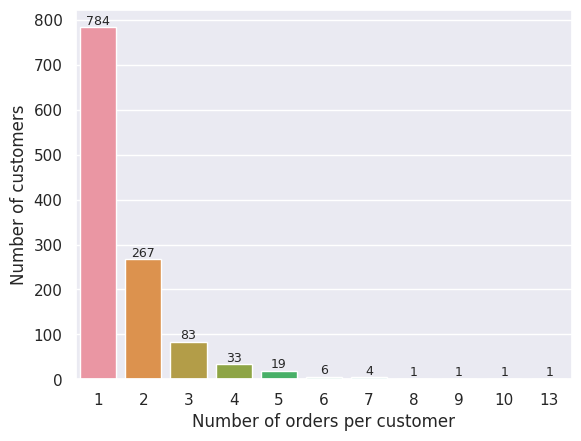

In [ ]:
# Calculate the number of orders per customer IDs
orders_per_customer = (
    df.customer_id     # Select the customer ID column
      .value_counts()  # Count the number of different IDs
      .value_counts()  # Count the occurences of each ID
)

bars = sns.barplot(
    x = orders_per_customer.index, # Number of orders per customer
    y = orders_per_customer        # Number of customers
)

bars.bar_label(bars.containers[0], fontsize=9)

plt.xlabel("Number of orders per customer")
plt.ylabel("Number of customers")
plt.show()

#### Observations

The large majority of FoodHub users has only used the platform once, while only **149** customers, i.e. **12%**,  have used it at least 3 times.

This distribution can have multiple causes:

- Many customers may use FoodHub out of curiosity or for a specific need, like trying out a new restaurant or experiencing the convenience.

- They might resort to online food delivery for unplanned occasions and not feel the same urgency to use the service ever after.

- Negative experiences with delivery, such as delays, incorrect orders, or food quality issues, could deter customers from using the service again.

- Other food delivery options might draw customers away from FoodHub, especially if they offer more attractive deals or more reliable deliveries.

### Top 5 restaurants in terms of the number of orders received

In [ ]:
# Select the restaurant_name column
# Count the occurences of each restaurant
# Select the top 5
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

Among the top 5 restaurants, there are 2 American, 2 Italian, and 1 Japanese establishment. This distribution aligns with the most frequently ordered cuisine types.

American fast-food restaurants typically offer the kind of food commonly ordered through online delivery platforms—affordable, speedy, and versatile, with a wide range of choices. Shake Shack, a prominent fast-food chain in NYC, logically holds a the top spot among the restaurants with the highest order counts.

Blue Ribbon, a widely recognized restaurant chain across the US, offers fried chicken and sushi, both of which are highly favored dishes, particularly in the US.

Given the global popularity of Italian cuisine and NYC's vibrant Italian culinary scene, it's not surprising to find Italian restaurants featured among the popular FoodHub restaurants.

### Most popular cuisine on weekends

In [ ]:
# Filter the weekend orders
# Select the cuisine type column
# Count the occurences of each cuisine type
# Select the top 1
df.query("day_of_the_week == 'Weekend'")["cuisine_type"].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

American dishes like burgers, fries or fried chicken, are the most popular on weekends: they are comfort food, easy to share between friends or at events like sports event or concerts, and easily customizable.

### Percentage of the orders > $20

In [ ]:
# Filter the orders > $20
# Count the number of rows
# Divide by the total number of rows
pct = df.query("cost_of_the_order > 20").shape[0] / df.shape[0]

# Format the output
print(f'{pct:.1%}')

29.2%


#### Observations:

29.2% of orders above $20 can be interpreted in multiple ways:
- Customers have a desire for quality food and restaurants.
- They are ready to pay more for the convenience of getting food delivered to their doorstep.
- Some orders are for multiple people.
-  FoodHub might have successfully implemented upselling techniques that encourage customers to choose more expensive items.

### Mean order delivery time

In [ ]:
# Select the delivery_time column
# Calculate the mean value
del_time = df.delivery_time.mean()

# Format the output
print(f"{del_time:.1f} min")

24.2 min


#### Observations:

The mean time of 24.2 min is lower than the median time of 25 min, typically showing a skewed distribution towards the slowest delivery times.

### Top 3 most frequent customers eligible to get a voucher

In [ ]:
# Filter the customer IDs
# Count the occurences of each value
# Select the top 3
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

As observed previously, only 14 customers ordered more at least 6 times on FoodHub. Therefore, the voucher is part of the FoodHub strategy to improve customer retention by offering benefits to regular customers, and to have more regular feedback.

## Multivariate Analysis

#### Heatmap

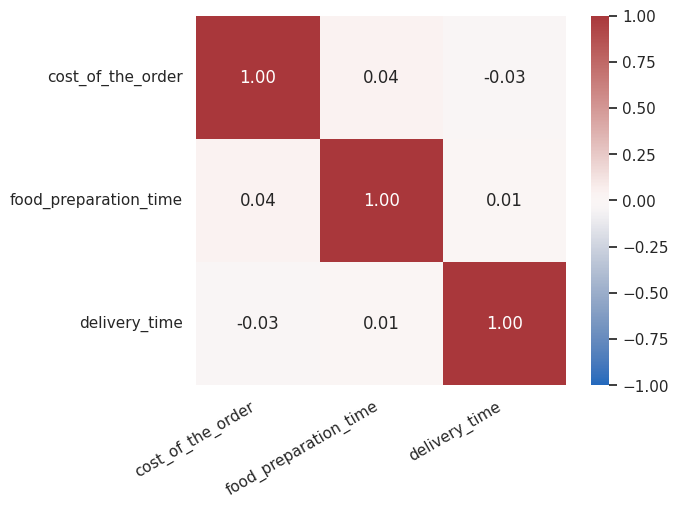

In [ ]:
# Columns selection
df_correlation = df.copy()[["cost_of_the_order", "food_preparation_time", "delivery_time"]]

# Compute the correlation matrix
corr = df_correlation.corr()

# Plot the heatmap
sns.heatmap(
    corr,
    cmap = "vlag", # Blue - White - Red
    vmin = -1,     # Scale from -1 to 1 (values on diagonal = 1)
    square = True,
    annot = True,  # Values printed in squares
    fmt = ".2f",
)

plt.xticks(rotation=30, ha='right')
plt.show()

#### Observations

The values in this heatmap are close to 0 (except the diagonal that is always equal to 1). Hence, there is no correlation among the order cost, preparation time, and delivery time, meaning that these variables need to be studied individually to identify the factors contributing to their fluctuations.

#### Cuisine type vs Cost of the order

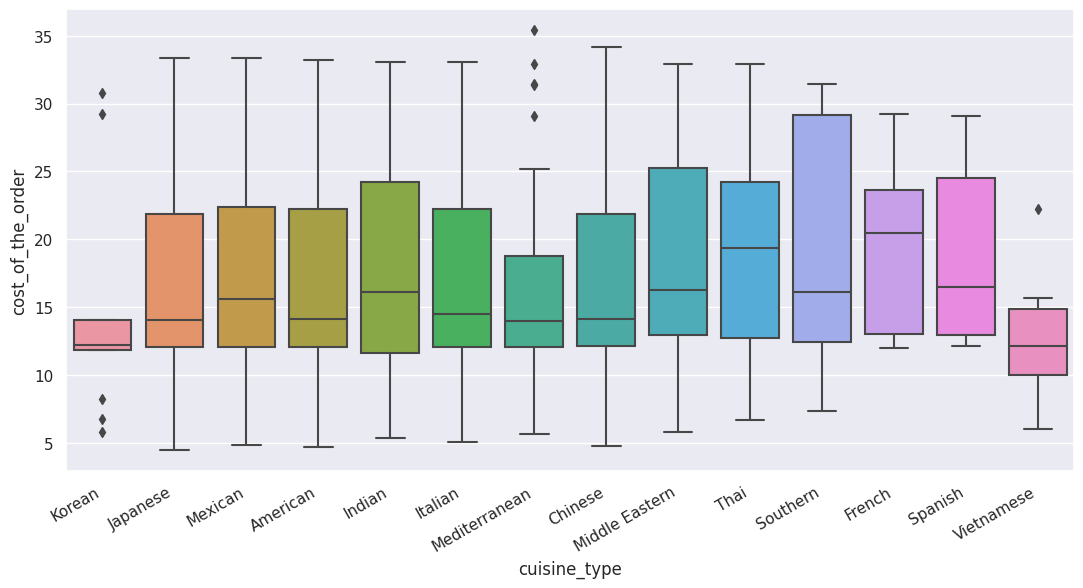

In [ ]:
# Figure parameters
plt.figure(figsize=(13,6))

# Distribution of the cost depending on the cuisine type
sns.boxplot(
    x = "cuisine_type",
    y = "cost_of_the_order",
    data = df,
)

plt.xticks(rotation=30, ha='right')
plt.show()

#### Observations:

The range of costs varies from \$5 to \$34-\$35 for the majority of cuisines types.

The cost distribution for Vietnamese and Korean restaurants is notably lower. But in light of their order counts showed in the univariate analysis, it is worth noting that these cuisines have a very limited number of orders on FoodHub. Consequently, the unusual statistics of these restaurants can be attributed in part to the limited dataset available for their specific cuisines.

Other cuisine types that stand out include the Mediterranean, French and Spanish types:

- Orders from the Mediterranean category exceeding \$25 are identified as outliers, implying that the majority of orders are gathered at a lower price range. It could suggest that FoodHub customers might not perceive Mediterranean restaurants as offering food quality that justifies a higher price compared to other restaurant types.

- Both French and Spanish cuisine types have a starting cost of approximately \$12, suggesting that even orders meant for a single person might be relatively expensive. The relative scarcity of French and Spanish cuisine in NYC could play a role due to fewer available restaurants and imported ingredients from Europe.

#### Cuisine type vs Food preparation time

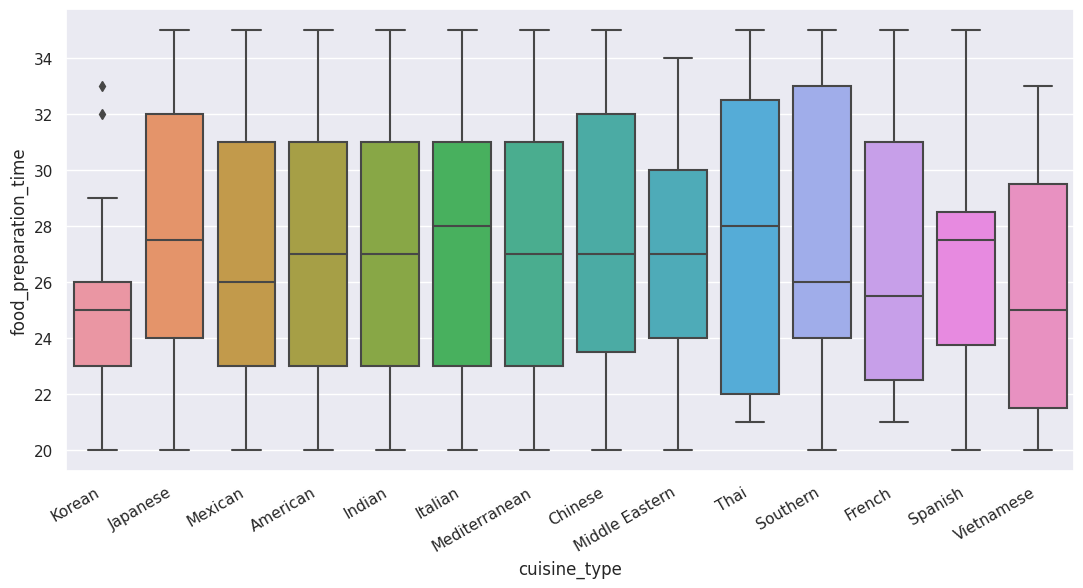

In [ ]:
# Figure parameters
plt.figure(figsize=(13,6))

# Distribution of the food preparation time depending on the cuisine type
sns.boxplot(
    x = "cuisine_type",
    y = "food_preparation_time",
    data = df,
)

plt.xticks(rotation=30, ha='right')
plt.show()

#### Observations:

The boxplots reveal a consistent trend across various parameters of interest:

- Range: Across all restaurant types, the swiftest orders are readied within a timeframe of 20 to 21 min, while the slowest take 33 to 35 min. However, an exception emerges with the Korean restaurant, where orders taking over 29 minutes are regarded as outliers. Additionally, its third quartile value stands notably lower than that of most other restaurant categories. This indicates that the Korean restaurant distinguishes itself by its notably faster order preparation compared to other establishments on FoodHub.

- The mean value is always between 25 min and 28 min.

- Interquartile range: The first quartile consistently falls within the range of 22 to 24 min — except for the Vietnamese restaurant. Similarly, the third quartile consistently ranges between 30 to 33 min, with the exception of the Korean restaurant. This implies that customers can reasonably expect a preparation duration spanning 22 to 33 min for the majority of restaurants. Notably, the Korean restaurant has a narrower interquartile range of just 3 min, indicating uniform pacing in preparing all its orders.

Overall, the distribution of preparation times remains fairly consistent across all cuisine types, improving the reliability of FoodHub's delivery service for its customers. There again, Korean and Vietnamese restaurant lack a wider database to draw relevant conclusion on their performance on FoodHub.

#### Restaurant names vs Total revenue

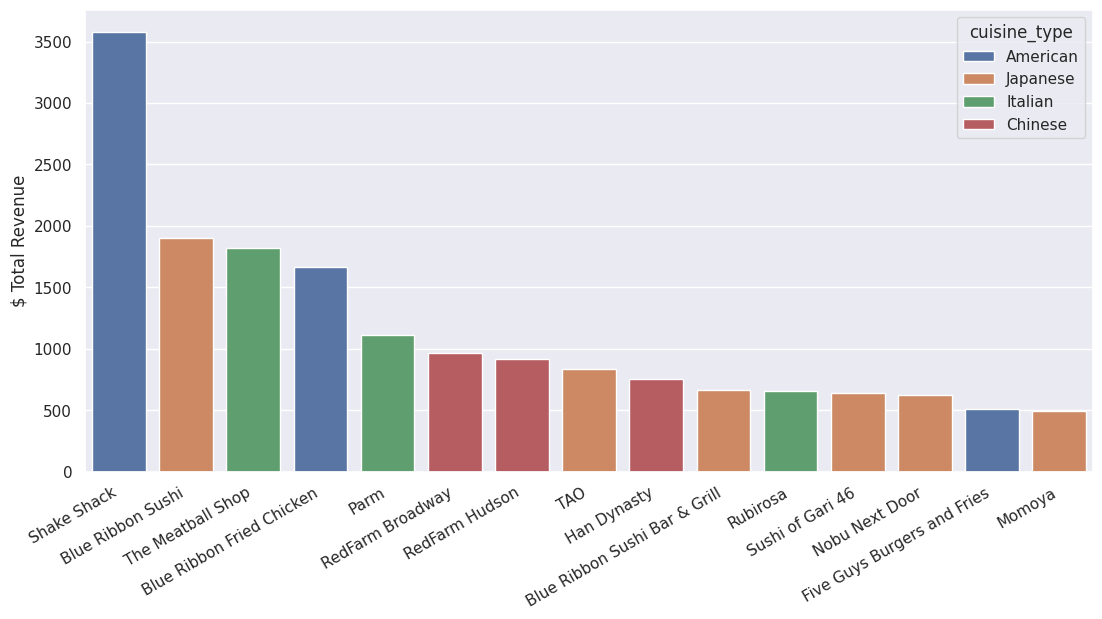

In [ ]:
# Figure parameters
fig, ax = plt.subplots(figsize=(13,6))

# Top 15 restaurant with the most revenues, and their associated cuisine type
top_15_revenues = (
 df.groupby(['restaurant_name', 'cuisine_type']).cost_of_the_order   # Groups indexed by name and type
      .sum()                  # Sum the order costs in each group
      .sort_values(ascending = False)
      .reset_index(level=1)   # Make cuisine type a column in the df
      .head(15)               # Top 15 restaurants
)

# Barplot of the total revenues of the 15 restaurants, colored by their cuisine type
sns.barplot(
    data = top_15_revenues,
    x = top_15_revenues.index.values,
    y = top_15_revenues.cost_of_the_order,
    hue = top_15_revenues.cuisine_type,
    dodge=False
)

plt.ylabel("$ Total Revenue")
plt.xticks(rotation=30, ha='right')
plt.show()

#### Observations:

Among the top 15 restaurants ranked by total revenues, only 4 out of the 14 available cuisine types are represented. This observation aligns with the findings from the univariate analysis regarding order counts based on cuisine type. Notably, Shake Shack stands out with a distinct competitive edge on the platform, boasting nearly double the revenue of the second most profitable restaurant. The convergence of American cuisine and a favorable reputation within a major American city creates an optimal environment for its success.

The prevalence of American, Japanese, Italian, and Chinese cuisines among the most profitable restaurants reflects a significant pattern. This pattern suggests that restaurants offering alternative cuisines could face challenges in establishing a customer base on this platform and increasing their profit margins.

#### Rating vs Preparation time, Delivery time and Cost of the order

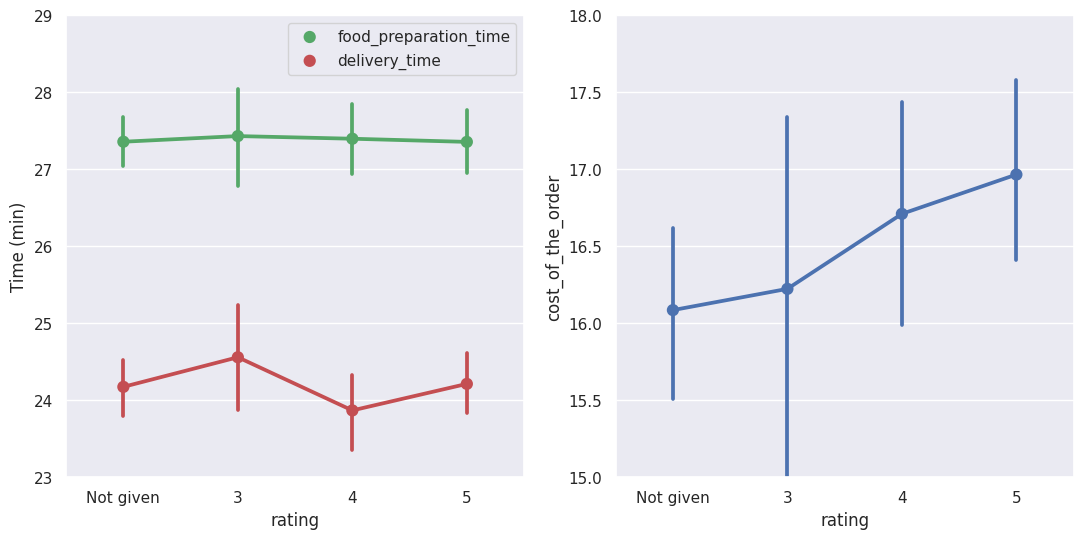

In [ ]:
# Write the code here

# Figure parameters
fig, (ax_time, ax_cost) = plt.subplots(1,2, figsize=(13, 6))

# Pointplot of the mean preparation time for each rating
sns.pointplot(
    x = 'rating',
    y = 'food_preparation_time',
    data = df,
    ax = ax_time,
    order = ["Not given", "3", "4", "5"],
    color = "g",
    label = "food_preparation_time"
)

# Pointplot of the mean delivery time for each rating
sns.pointplot(
    x = 'rating',
    y = 'delivery_time',
    data = df,
    ax = ax_time,
    order = ["Not given", "3", "4", "5"],
    color = "r",
    label = "delivery_time"
)


# Pointplot of the mean cost for each rating
sns.pointplot(
    x = 'rating',
    y = 'cost_of_the_order',
    data = df,
    order = ["Not given", "3", "4", "5"],
    ax = ax_cost
)

# Min and max values for the y axis
ax_cost.set_ylim(ymin=15, ymax=18)
ax_time.set_ylim(ymin=23, ymax=29)

# Legend and y label
ax_time.legend()
ax_time.set_ylabel("Time (min)")

plt.show()

#### Observations:

The ratings are compared in these pointplots to the preparation and delivery times, and to the cost of orders.

From the time pointplot, there isn't a clear pattern indicating that ratings vary significantly due to fluctuations in delivery or preparation time. Considering the range of mean values and the error bars on the plot, it's also improbable that customers would assign different ratings for orders differing by as little as 30 s in total time.

In the cost pointplot, a discernible trend emerges. Generally, higher ratings are associated with relatively more expensive orders. If the correlation between pricier orders and better quality food holds true, it's logical to expect higher ratings for such orders. The substantial error bar accompanying the rating of 3 indicates that this rating is assigned to a broader range of costs. This suggests that customers might encounter orders where the food quality doesn't justify its price, or where the price is too low to expect a food quality worth a higher rating. Finally, it's worth noting that the orders without ratings are, on average, the least expensive. This pattern could mean that customers who opt for lower-priced items often have minimal expectations and make quick and basic choices without feeling the need to provide feedback for their order.

### Restaurants eligible for a promotional offer with a rating count > 50 and an average rating > 4

In [ ]:
# Filter the orders where a rating was given
df_rated = df.query("rating != 'Not given'").copy()

# Convert the ratings to integer
df_rated.rating = df_rated.rating.astype(int)

# Group the orders by restaurant name
rating_by_name = df_rated.groupby("restaurant_name").rating

# Store the rating count of each restaurant in a sorted Series
df_rating_count = rating_by_name.sum().sort_values(ascending=False)
df_rating_count.name = "rating_count"

# Store the average rating of each restaurant in a sorted Series
df_avg_rating = rating_by_name.mean().sort_values(ascending=False)
df_avg_rating.name = "avg_rating"

# Concatenate both Series to create a DataFrame which index in composed of all the restaurant names
df_concat = pd.concat([df_rating_count, df_avg_rating], axis=1)

# Filter the restaurants with a rating count > 50 and an average rating > 4
df_concat.query("rating_count > 50 & avg_rating > 4")

,rating_count,avg_rating
restaurant_name,,
Shake Shack,569,4.278195
The Meatball Shop,379,4.511905
Blue Ribbon Sushi,308,4.219178
Blue Ribbon Fried Chicken,277,4.328125
RedFarm Broadway,174,4.243902
Parm,161,4.128205
RedFarm Hudson,142,4.176471
TAO,122,4.357143
Han Dynasty,102,4.434783


#### Observations:

A total of **25** restaurants fulfill the criteria for both rating count and average rating, accounting for **14%** of the entire FoodHub selection. It is reasonable that FoodHub aims to showcase restaurants with sufficient positive feedback in order to guide customers towards high-quality dining experiences.

However, promoting restaurants solely based on these two criteria can potentially have adverse effects on restaurants with a smaller customer base. For instance, all 15 of the top revenue-generating restaurants identified in Question 14 are encompassed in this list. As a result, they gain a competitive edge through more advertisement, despite already thriving with positive customer engagement.

Conversely, restaurants specializing in alternative cuisines — everything except American, Italian, Japanese, or Chinese — could encounter challenges in promoting their offerings and attracting new customers.

Hence, while this promotional offer may appear advantageous for restaurants already in a successful position, it could entail disadvantages for the remaining 153 restaurants not included on this list. These establishments, though capable of providing top-notch cuisine, might find it challenging to expand their clientele due to the limited advertising exposure.

### Foodhub charge:
- 25% on the orders having cost greater than 20 dollars
- 15% on the orders having cost greater than 5 dollars.

### Net revenue calculation

In [ ]:
# Most expensive order
max_order = df.cost_of_the_order.max()

# Total net revenue from the charge rate
revenue = (
    # Sum the net revenues from the 15% rate and 25% rate
    sum(df.query("@min_price <= cost_of_the_order <= @max_price")   # Filter the orders based on their price
          .cost_of_the_order           # Select the cost_of_the_order column
          .apply(lambda x: x * rate)   # Apply the charge rate
          .sum()                       # Sum the net revenues from each order

        # Rate values depending on price
        for min_price, max_price, rate in [(5, 19.99, 0.15),       # Order >= $5 and < $20
                                           (20, max_order, 0.25)]  # Order >= 20$
    )
)

print(f"${revenue:.2f}")

$6166.30


#### Observations:


FoodHub earns **\$6166.30** from their rate. With a total of 1898 orders, FoodHub is generating \$3.25 per order. Considering the average order price of \$16.5 (Question 3), FoodHub's share amounts to approximately **19.7%** of the order value on average.

This fee becomes a crucial factor for restaurants, particularly smaller establishments with fewer customers on the platform. These restaurants need to factor in this fee when determining their pricing, as it can directly impact their profit margins. This effect often translates to higher prices for online food orders compared to the same items served directly at the restaurant. Hence, customers experience an additional expense for the convenience of having their food delivered.

### % of orders that take more than 1h to get delivered from the time the order is placed

In [ ]:
# Filter the rows where the sum of the preparation and delivery time > 60
# Get the number of rows
# Ratio with the total number of rows
pct = df.query("food_preparation_time + delivery_time >= 60").shape[0] / df.shape[0]

print(f"{pct:.1%}")

12.9%


#### Observations:

A typical lunch break on weekdays usually spans around 60 minutes. Consequently, an order taking this duration to arrive is likely to hinder customers from enjoying a proper lunch. Thus, the figure of **12.9%** is notably significant: for a frequent FoodHub user who places orders 2 times weekly, this percentage translates to approximately 1 order per month with a delivery time exceeding 1 hour. Hence, this represents a critical issue that demands attention from FoodHub.

### Mean delivery time on weekdays and weekends

In [ ]:
# Filter the weekdays and calculate the mean of the delivery time column
weekdays = df.query("day_of_the_week == 'Weekday'").delivery_time.mean()

# Filter the weekend and calculate the mean of the delivery time column
weekends = df.query("day_of_the_week == 'Weekend'").delivery_time.mean()

print(f"Weekdays mean delivery time: {weekdays:.1f} min")
print(f"Weekends mean delivery time: {weekends:.1f} min")
print(f"Delta time: {weekdays - weekends:.1f} min")

Weekdays mean delivery time: 28.3 min
Weekends mean delivery time: 22.5 min
Delta time: 5.9 min


#### Observations:


There is a noticeable delay for orders on weekdays of nearly **6min**, i.e. a **26%** increase in delivery time:

- On weekdays, there is typically more traffic on the roads due to people commuting to work, school, or other activities. This increased traffic can slow down delivery drivers and result in longer delivery times.

- Restaurants might not be located near NYC business districts, from where workers order their food to have lunch or dinner on weekdays. Instead, they might be closer to residential areas from where people order their food on weekends.


## Conclusion and recommendations

### Conclusions:

- FoodHub offer is mainly dominated by 4 types of cuisines: American, Japanese, Italian and Chinese. Although there are 14 cuisine types represented on FoodHub, the top 4 generates the most frequent orders and the most revenues, as the restaurants specialized in these particular cuisines are the most popular by a significant margin.

- The average delivery time is significantly longer on weekdays compared to weekends, although the demand for deliveries is higher on weekends. Also, nearly 13% of orders take 1h+ to be delivered.

- The large majority of customers uses FoodHub only once or twice.

- Customers are more likely not to give any rating than any other rating, but mean order costs seem to have a impact of the rating trend.

### Recommendations:

- FoodHub should promote advertisement of restaurants offering alterative cuisine types instead of relying solely on rating count and average rating. Therefore, the customer would be more likely to try new restaurants, which would in turn build a new clientele and provide more feedback for these restaurants.

- The delivery system requires a thorough review and optimization, particularly on weekdays. It is essential to explore strategies to ensure that orders are delivered within a 1-hour timeframe or less. This could involve investments in new vehicles, recruitment of additional delivery drivers, and improving the algorithm responsible for assigning vehicles to specific areas and coordinating food deliveries.

- New strategies must be explored to improve customer retention and engagement with the FoodHub platform. Having loyal customers means a growing clientele for the restaurants and more feedback for FoodHub, both on its delivery service efficiency and on the customers satisfaction. There are numerous ways to get more ratings: for instance, reminders, surveys, incentives, showcased reviews or more engaging content.